<a href="https://colab.research.google.com/github/joaocarvoli/ML-problems/blob/main/problems/01_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem: Titanic's shipwreck
> You need to predict if a passenger will survive or not. “what sorts of people were more likely to survive?” 

Links:
- [Titanic - Machine Learning from Disaster @Kaggle](https://www.kaggle.com/competitions/titanic)

![](https://cdn.radiofrance.fr/s3/cruiser-production/2021/04/be48c786-c1ca-40e9-9d82-0a24395f0f85/1200x630_gettyimages-517359150.jpg)
[source image](https://cdn.radiofrance.fr/s3/cruiser-production/2021/04/be48c786-c1ca-40e9-9d82-0a24395f0f85/1200x630_gettyimages-517359150.jpg)

# 1 - Imports

In [77]:
# Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Data import
dataframe_train = pd.read_csv('/content/drive/MyDrive/datasets/titanic/train.csv')
dataframe_test = pd.read_csv('/content/drive/MyDrive/datasets/titanic/test.csv')

# 2 - Preprocessing & Data Analisys

In [3]:
# How is Our data?
dataframe_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Let's drop the name and id columns because they are irrelevant for us
dataframe_train.drop(columns = 'Name', inplace = True)
dataframe_train.drop(columns = 'PassengerId', inplace = True)

In [5]:
# What is Our data bounds(shape)?
dataframe_train.shape

(891, 10)

### 2.1 - Null values

In [6]:
# Does We have missing data?
dataframe_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We have three columns with missing values, let's know why!

In [7]:
# This column is the age of each passenger
dataframe_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

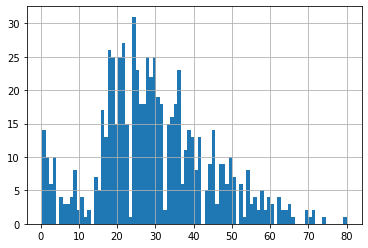

In [8]:
# Age distribuition
dataframe_train['Age'].hist(bins=dataframe_train['Age'].value_counts().count());

In [9]:
# For this column above we will use a metric to input data into NaN values
dataframe_train['Age'].fillna(method = 'bfill', inplace = True) # This method is more preserver of the previous distribution

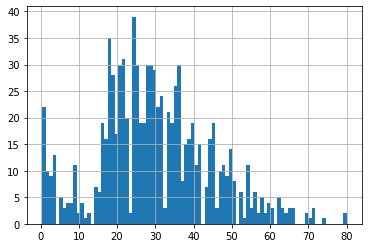

In [10]:
dataframe_train['Age'].hist(bins=dataframe_train['Age'].value_counts().count());

In [11]:
# This column is which cabin a passenger is located
dataframe_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [12]:
print(f"We have only {dataframe_train['Cabin'].value_counts().count()} of {dataframe_train.shape[0]} valid values for Cabin column, therefore, values that are not null and are unique")

We have only 147 of 891 valid values for Cabin column, therefore, values that are not null and are unique


In [13]:
# We will discard this column also because its values are insignificant
dataframe_train.drop(columns = 'Cabin', inplace = True)

In [14]:
# We will fill the rows that have at least one missing value, in this case, two rows, to be easy to use to deal with test data after
dataframe_train['Embarked'].fillna(method = 'bfill', inplace = True)

### 2.2 - Categorical columns

In [15]:
dataframe_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [16]:
dataframe_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
# Let's trasnform this column into two, using one hot encoding. Only above the non hierarchical columns
dataframe_train = pd.get_dummies(data = dataframe_train, columns = ['Sex','Embarked'])
dataframe_train

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,113803,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,112053,30.0000,1,0,0,0,1
888,0,3,26.0,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,111369,30.0000,0,1,1,0,0


In [18]:
dataframe_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [19]:
# Let's drop the column 'Ticket' because there are a lot of values and there is no a pattern
dataframe_train.drop(columns = 'Ticket', inplace = True)

### 2.3 - Numerical columns

### 2.3.1 - Normalization (Let's see how is our data distribution to normalize the values)

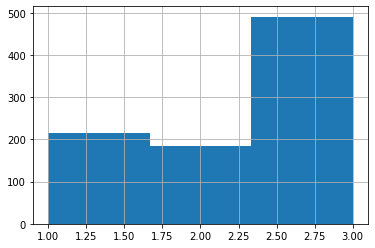

In [20]:
dataframe_train['Pclass'].hist(bins=dataframe_train['Pclass'].value_counts().count());

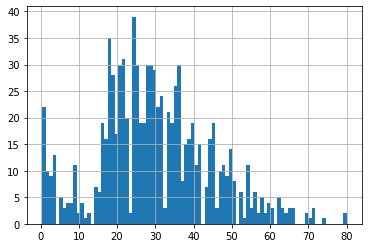

In [21]:
dataframe_train['Age'].hist(bins=dataframe_train['Age'].value_counts().count());

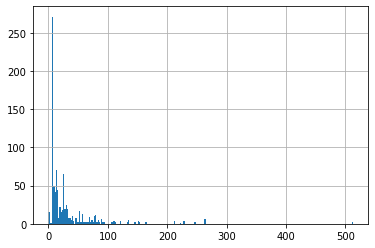

In [22]:
dataframe_train['Fare'].hist(bins=dataframe_train['Fare'].value_counts().count());

Before normalize the data let's split into X_train and y_train.

In [23]:
y_train = dataframe_train.loc[:,'Survived']
dataframe_train.drop(columns = 'Survived', inplace = True)
X_train = dataframe_train

In [24]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,26.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [25]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Let's normalize this data because its values have different ranges and to remove bias too

In [26]:
scaler_min_max = MinMaxScaler()
X_train_minmax = scaler_min_max.fit_transform(X_train)

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)

The numerical columns are configured well. Each column has its specific values and there is no need to create more columns to resolve possible errors like hierarchical values.

### Applying preprocessing in Test Set

In [27]:
dataframe_test.drop(columns = 'Name', inplace = True)
dataframe_test.drop(columns = 'PassengerId', inplace = True)

dataframe_test['Age'].fillna(method = 'bfill', inplace = True)

dataframe_test.drop(columns = 'Cabin', inplace = True)

dataframe_test['Embarked'].fillna(method = 'bfill', inplace = True)

dataframe_test = pd.get_dummies(data = dataframe_test, columns = ['Sex','Embarked'])

dataframe_test.drop(columns = 'Ticket', inplace = True)

X_test = dataframe_test

X_test_minmax = scaler_min_max.transform(X_test)
X_test_std = scaler_std.transform(X_test)

# 3 - Algorithm

Now, let's study which algorithm should we apply and improve its performace using `Accuracy`.

#### Logistic Regression

In [82]:
parameters_log = {'solver':('lbfgs',),
                  'max_iter':[335,500]}
log_grid = LogisticRegression()
grid_log = GridSearchCV(estimator = log_grid,  param_grid = parameters_log, scoring = 'accuracy', cv = 10)
grid_log.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'max_iter': [335, 500], 'solver': ('lbfgs',)},
             scoring='accuracy')

In [87]:
grid_log.best_score_

0.7901248439450687

#### KNN

In [89]:
parameters_knn = {
    'n_neighbors':[3,5,7]
}
knn_grid = KNeighborsClassifier()
grid_knn = GridSearchCV(estimator = knn_grid,  param_grid = parameters_knn, scoring = 'accuracy', cv = 10)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='accuracy')

In [91]:
grid_knn.best_score_

0.7205617977528089

#### Gaussian NB

In [95]:
parameters_gnb = {
    
}
gnb_grid = GaussianNB()
grid_gnb = GridSearchCV(estimator = gnb_grid,  param_grid = parameters_gnb, scoring = 'accuracy', cv = 10)
grid_gnb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), param_grid={}, scoring='accuracy')

In [96]:
grid_gnb.best_score_

0.7879026217228464

#### Random Forest

In [97]:
parameters_randomForest = {
    'random_state':[42]
}
randomForest_grid = RandomForestClassifier()
grid_randomForest = GridSearchCV(estimator = randomForest_grid,  param_grid = parameters_randomForest, scoring = 'accuracy', cv = 10)
grid_randomForest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'random_state': [42]}, scoring='accuracy')

In [98]:
grid_randomForest.best_score_

0.812609238451935

## `Fonts:`
- [`Tackling Missing Value in Dataset` *@analyticsvidhya*](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)
- [`Why One-Hot Encode Data in Machine Learning?` *@machinelearningmastery*](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)
- [`Top 10 Binary Classification Algorithms [a Beginner’s Guide]
` Alex Ortner*@medium*](https://medium.com/thinkport/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2)